In [18]:
import qutip
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, QobjEvo, basis, sesolve, sigmax, sigmay, sigmaz, tensor, qeye

%matplotlib inline

In [2]:
psi_x = (basis(2, 0) + basis(2, 1)).unit()
psi_mx = (basis(2, 0) - basis(2, 1)).unit()
psi_y = (basis(2, 0) + 1j*basis(2, 1)).unit()
psi_my = (basis(2, 0) - 1j*basis(2, 1)).unit()
psi_z = basis(2, 0)
psi_mz = basis(2, 1)
psi_00=tensor(basis(2,0),basis(2,0))
psi_10=tensor(basis(2,1),basis(2,0))
psi_01=tensor(basis(2,0),basis(2,1))
psi_11=tensor(basis(2,1),basis(2,1))

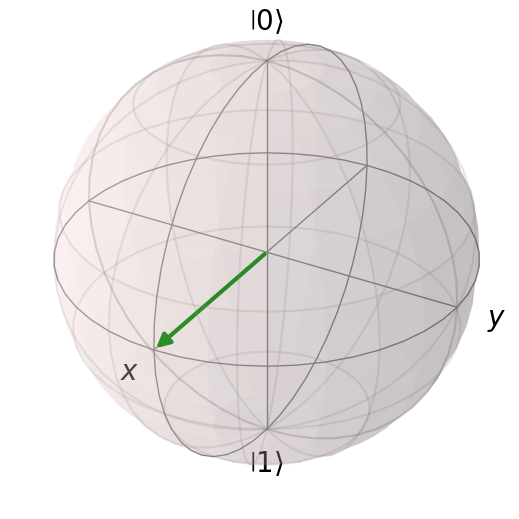

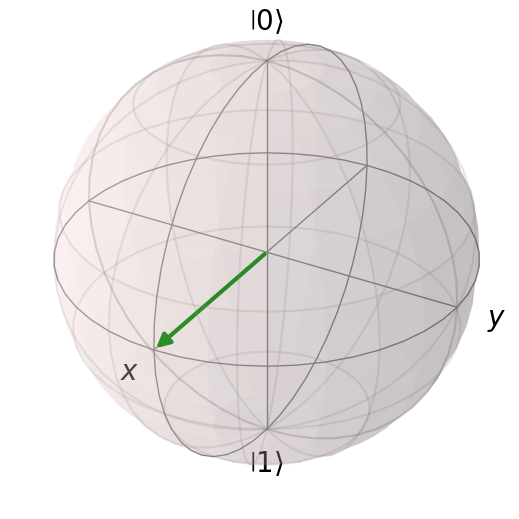

In [3]:
b = Bloch()
b.add_states(psi_x)
b.show()

In [ ]:
s_x, s_y, s_z = sigmax(), sigmay(), sigmaz()

def solve_rabi(w0, w1, w):
  def hamiltonian(t):
    return -1/2*w1*( np.cos(w*t)*s_x - np.sin(w*t)*s_y ) - 1/2*w0*s_z

  H_t = QobjEvo(hamiltonian)
  psi_0 = basis(2, 0)

  ops = [s_x, s_y, s_z, basis(2, 0).proj(), basis(2, 1).proj()]
  ops_names = [r'$s_x$', r'$s_y$', r'$s_z$', r'$P_0$', r'$P_1$']

  res = sesolve(H_t, psi_0, np.arange(0, 20, 0.1), ops)

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(3):
    ax.plot(res.times, res.expect[i])
  ax.legend(ops_names[:3])
  ax.set_title(f"$w={w}, w_0={w0}, w_1={w1}$")
  plt.show()

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(3, 5):
    ax.plot(res.times, res.expect[i])
  ax.legend(ops_names[3:])
  ax.set_title(f"$w={w}, w_0={w0}, w_1={w1}$")
  plt.show()


/home/ashihad/repos/qc/.venv/lib64/python3.13/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


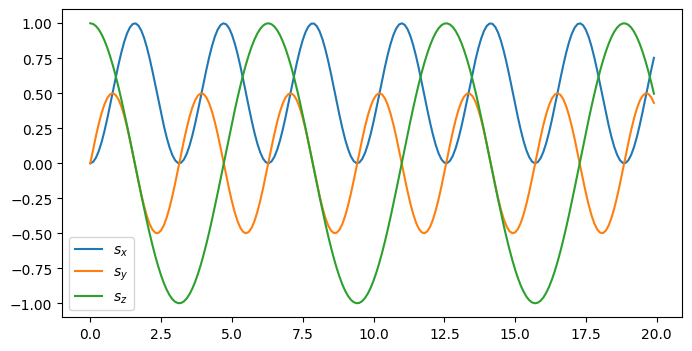

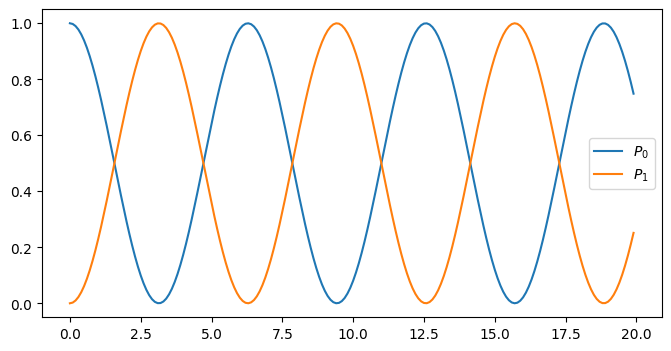

In [40]:
w0 = 1
w1 = 1
w = 1

solve_rabi(w0, w1, w)

/home/ashihad/repos/qc/.venv/lib64/python3.13/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


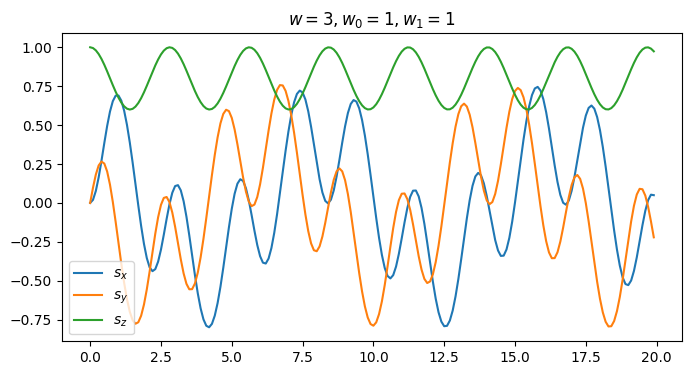

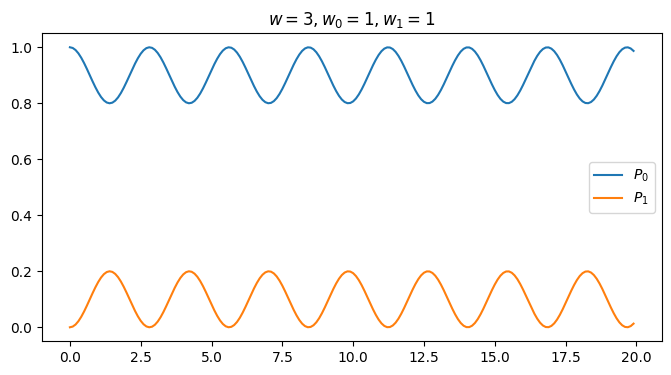

In [43]:
w0 = 1
w1 = 1
w = 3*w0

solve_rabi(w0, w1, w)

In [86]:
s_x = sigmax()

def solve_rx(phi, mean, sigma):
  def gaussian(t):
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(((t-mean)**2)/(2*sigma**2)))
  def hamiltonian(t):
    return s_x/2 * phi*gaussian(t)
  
  H_t = QobjEvo(hamiltonian)
  psi_0 = basis(2, 0)

  ops = [s_x, s_y, s_z, basis(2, 0).proj(), basis(2, 1).proj()]
  ops_names = [r'$s_x$', r'$s_y$', r'$s_z$', r'$P_0$', r'$P_1$']

  res = sesolve(H_t, psi_0, np.arange(0, 7, 0.01), ops)

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(3):
    ax.plot(res.times, res.expect[i])
  # add gaussian
  ax.plot(res.times, [(sigma*np.sqrt(2*np.pi))*gaussian(t) for t in res.times], color='k')
  ax.legend(ops_names[:3] + ['gaussian'])
  ax.set_title(r"$H = \frac{s_x \cdot \Phi}{2} \cdot \Omega(t)$")
  plt.show()

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(3, 5):
    ax.plot(res.times, res.expect[i])
  # add gaussian
  ax.plot(res.times, [(sigma*np.sqrt(2*np.pi))*gaussian(t) for t in res.times], color='k')
  ax.legend(ops_names[3:] + ['gaussian'])
  ax.set_title(r"$H = \frac{s_x \cdot \Phi}{2} \cdot \Omega(t)$")
  plt.show()

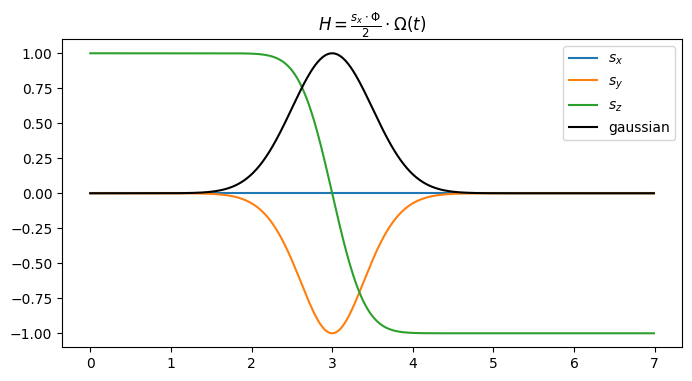

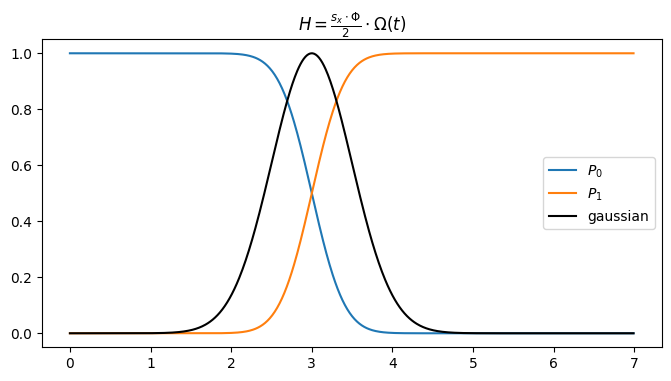

In [87]:
theta = np.pi
mean = 3
sigma = 0.5

solve_rx(theta, mean, sigma)

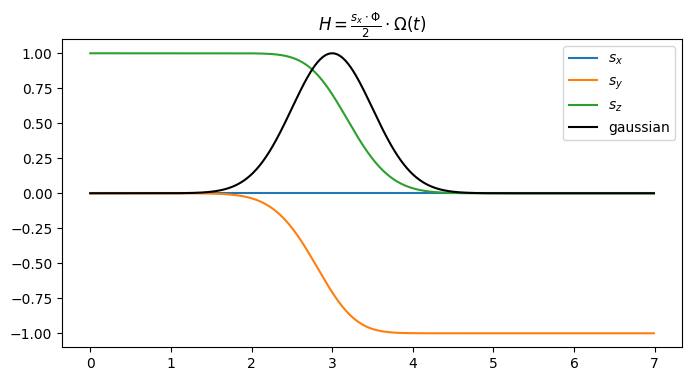

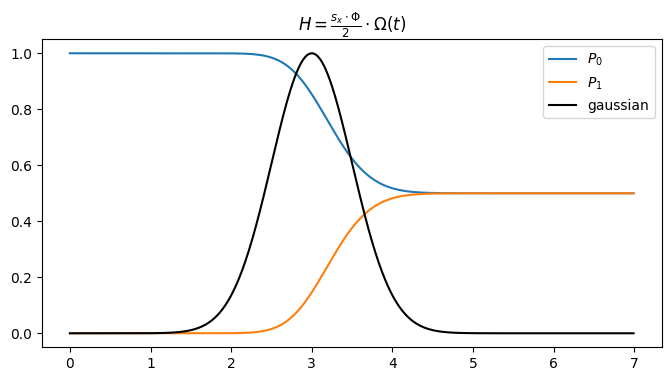

In [88]:
theta = np.pi/2
mean = 3
sigma = 0.5

solve_rx(theta, mean, sigma)

In [123]:
s_x = sigmax()

def solve_swap(theta, mean, sigma):
  sz1 = tensor(sigmaz(), qeye(2))
  sz2 = tensor(qeye(2), sigmaz())

  def gaussian(t):
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(((t-mean)**2)/(2*sigma**2)))
  def hamiltonian(t):
    return 1/4 * theta * gaussian(t) * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()) + tensor(sigmaz(), sigmaz()))
  
  H_t = QobjEvo(hamiltonian)
  # psi_0 = basis(2, 0)
  psi_0 = psi_10

  ops = [psi_00.proj(), psi_01.proj(), psi_10.proj(), psi_11.proj(), sz1, sz2]
  ops_names = [r'$\Psi_{00}$', r'$\Psi_{01}$', r'$\Psi_{10}$', r'$\Psi_{11}$', r'$\sigma_{z1}$', r'$\sigma_{z2}$']

  res = sesolve(H_t, psi_0, np.arange(0, 7, 0.01), ops)

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(4):
    ax.plot(res.times, res.expect[i])
  # add gaussian
  ax.plot(res.times, [(sigma*np.sqrt(2*np.pi))*gaussian(t) for t in res.times], color='k')
  ax.legend(ops_names[:4] + ['gaussian'])
  ax.set_title("SWAP gate")
  plt.show()

  fig, ax = plt.subplots(figsize=(8, 4))
  for i in range(4, 6):
    ax.plot(res.times, res.expect[i])
  # add gaussian
  ax.plot(res.times, [(sigma*np.sqrt(2*np.pi))*gaussian(t) for t in res.times], color='k')
  ax.legend(ops_names[4:] + ['gaussian'], loc='right')
  ax.set_title("SWAP gate")
  plt.show()

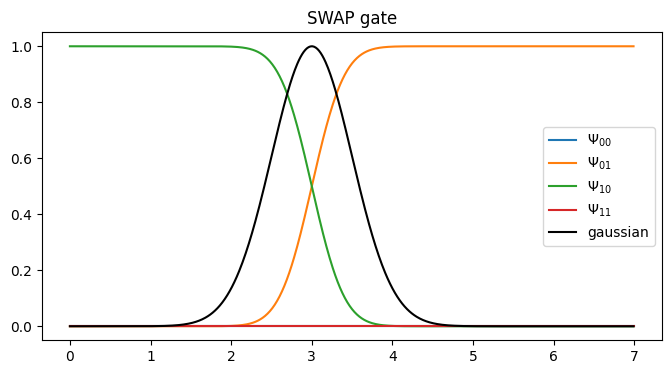

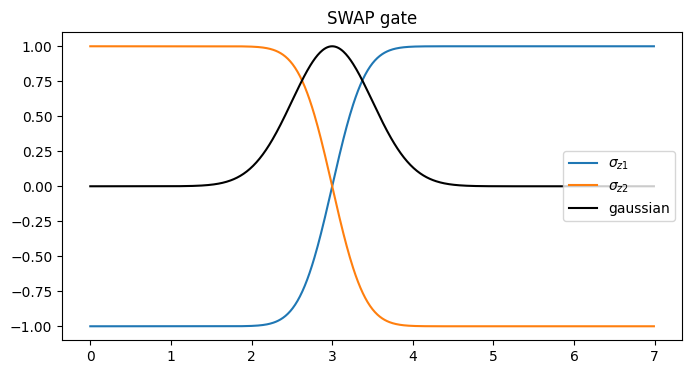

In [125]:
theta = np.pi
mean = 3
sigma = 0.5

solve_swap(theta, mean, sigma)

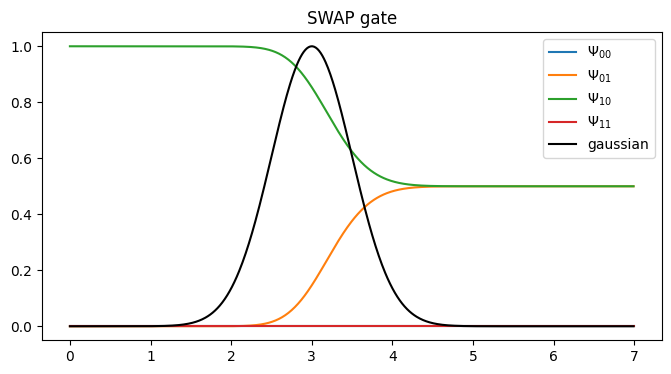

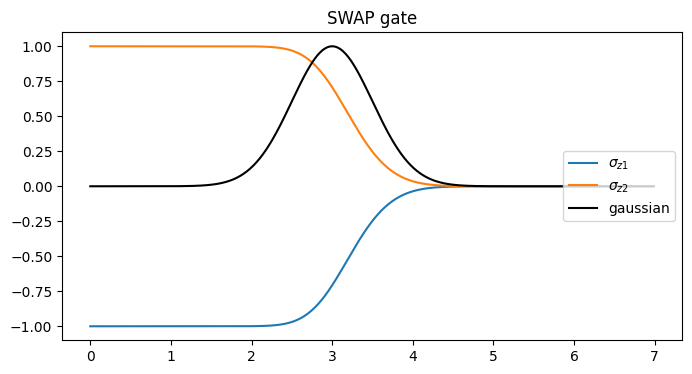

In [126]:
theta = np.pi/2
mean = 3
sigma = 0.5

solve_swap(theta, mean, sigma)